## 1. Import Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans ,DBSCAN , AgglomerativeClustering
import seaborn as sns

In [2]:
iris = pd.read_csv('iris.csv').iloc[:,1:]

## 2. EDA

In [3]:
iris['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

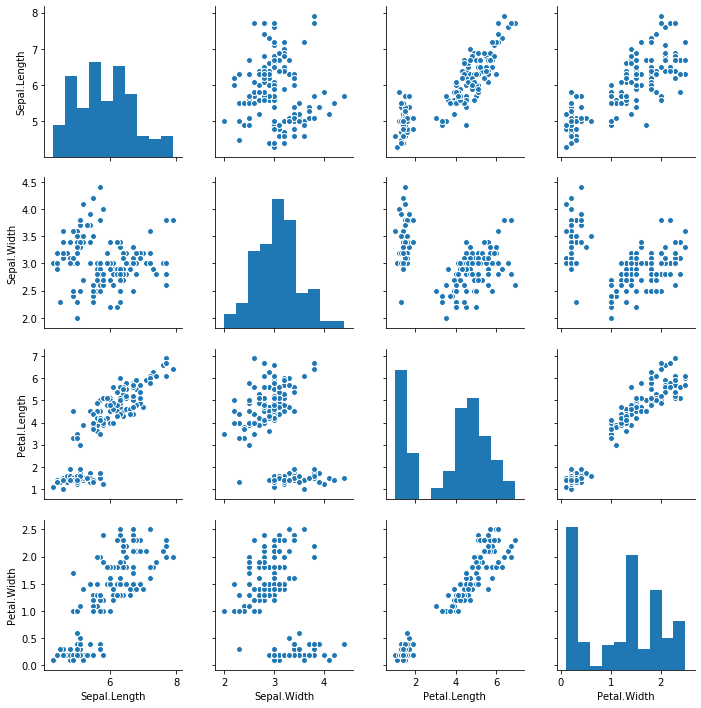

In [4]:
sns.pairplot(iris)

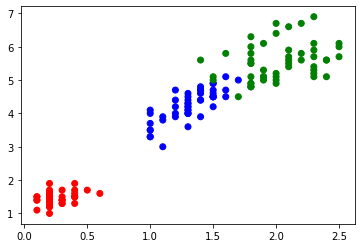

In [5]:
col = pd.Series(iris['Species']).map({'setosa':'r','versicolor':'b','virginica':'g'})
plt.scatter(iris['Petal.Width'],iris['Petal.Length'],c=col)

## 3.Clustering
### (1) KMeans

In [8]:
kmeans = KMeans(n_clusters=3)

In [9]:
# label(y) 값만 빼고
x=iris.iloc[:,0:4]

In [10]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [12]:
kmeans.inertia_

78.85144142614601

In [13]:
kmeans.n_iter_

2

In [14]:
col = pd.Series(kmeans.labels_).map({0:'r',1:'b',2:'g'})

In [15]:
col.values

array(['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b',
       'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'r', 'r',
       'g', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r',
       'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'r', 'g', 'r', 'g', 'g',
       'g', 'g', 'r', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'g', 'g',
       'g', 'g', 'r', 'g', 'r', 'g', 'r', 'g', 'g', 'r', 'r', 'g', 'g',
       'g', 'g', 'g', 'r', 'g', 'g', 'g', 'g', 'r', 'g', 'g', 'g', 'r',
       'g', 'g', 'g', 'r', 'g', 'g', 'r'], dtype=object)

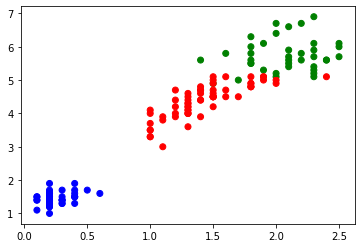

In [16]:
plt.scatter(iris['Petal.Width'],iris['Petal.Length'],c=col)

### (2) DBSCAN

In [17]:
dbscan = DBSCAN(eps=0.5,min_samples=5)

In [18]:
dbscan.fit(x).labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [19]:
col = pd.Series(dbscan.fit(x).labels_).map({-1:'k',0:'r',1:'b'})

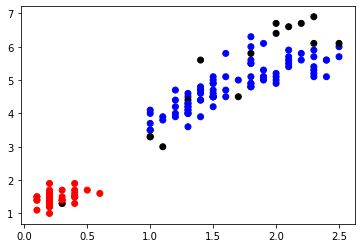

In [20]:
plt.scatter(iris['Petal.Width'],iris['Petal.Length'],c=col)

### (3) Agglomerative

In [21]:
agnes = AgglomerativeClustering(n_clusters=3)

{distance_threshold=적정거리}  설정을 통해 최적 클러스터 개수와 아웃라이어 대비를 할 수 있음 but 적정거리를 찾는 것이 어려움

In [22]:
agnes.fit(x)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=3,
            pooling_func=<function mean at 0x0000021C1ED22D08>)

In [23]:
agnes.fit(x).labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [24]:
col = pd.Series(agnes.fit(x).labels_).map({0:'r',1:'g',2:'b'})

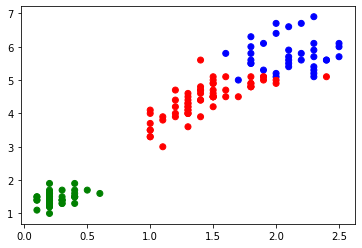

In [25]:
plt.scatter(iris['Petal.Width'],iris['Petal.Length'],c=col)